In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier as SklearnDecisionTreeClassifier
from gaussian_naive_bayes import GaussianNaiveBayes
from sklearn.naive_bayes import GaussianNB 

In [3]:
# Load the datasets
iris_data = load_iris()
wine_data = load_wine()
breast_cancer_data = load_breast_cancer()

datasets = [
    ("Iris", iris_data.data, iris_data.target),
    ("Wine", wine_data.data, wine_data.target),
    ("Breast Cancer", breast_cancer_data.data, breast_cancer_data.target)
]

# Initialize models
models = {
    'Custom Gaussian Naive Bayes': GaussianNaiveBayes(),
    'Scikit-Learn Gaussian Naive Bayes': GaussianNB()
}

In [4]:
results = {}
for name, model in models.items():
    results[name] = []
    for dataset_name, X, y in datasets:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name].append(accuracy)

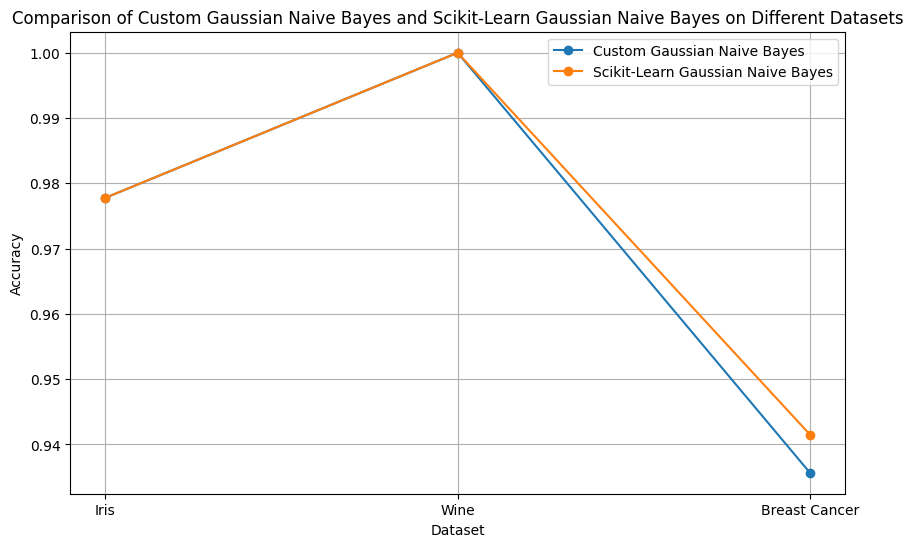

In [5]:
# Plotting the results
plt.figure(figsize=(10, 6))
for name, accuracies in results.items():
    plt.plot(range(1, len(datasets)+1), accuracies, label=name, marker='o')

plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Comparison of Custom Gaussian Naive Bayes and Scikit-Learn Gaussian Naive Bayes on Different Datasets')
plt.xticks(range(1, len(datasets)+1), [name for name, _, _ in datasets])
plt.legend()
plt.grid(True)
plt.show()